In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [6]:
df=pd.read_csv('/content/diabetes2.csv')

In [7]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df.shape

(768, 9)

In [9]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
# seperate input and output variables

x = df.drop(columns=['Outcome'])
y = df['Outcome']

In [13]:
# cross validation

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.25)

In [14]:
x_train.shape,y_train.shape

((576, 8), (576,))

In [15]:
x_test.shape,y_test.shape

((192, 8), (192,))

In [16]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler()

In [19]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:

from sklearn.linear_model import LogisticRegression

log=LogisticRegression()

In [21]:
log.fit(x_train_scaled,y_train)

LogisticRegression()

In [22]:
y_pred=log.predict(x_test_scaled)

In [23]:
y_pred


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
newdf=pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

In [25]:
newdf

,Actual,Predicted
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
366,1,0
301,1,0
382,0,0
140,0,0


In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

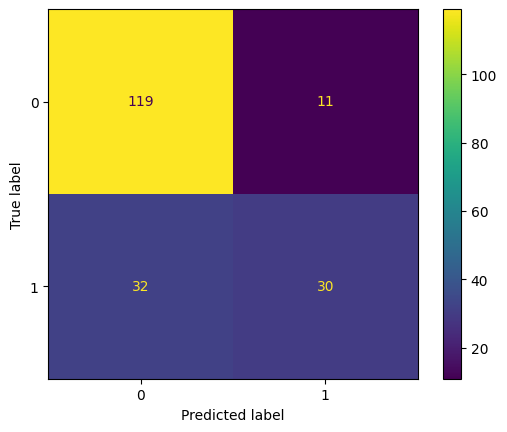

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred);

In [28]:
print(classification_report(y_test,y_pred));

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       130
           1       0.73      0.48      0.58        62

    accuracy                           0.78       192
   macro avg       0.76      0.70      0.71       192
weighted avg       0.77      0.78      0.76       192



In [29]:
recall= 119/130
recall

0.9153846153846154

In [30]:
precision = 119/151
precision

0.7880794701986755

In [31]:
(2*recall*precision)/(recall+precision)

0.8469750889679715

In [32]:
accuracy_score(y_test,y_pred)

0.7760416666666666

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve

In [34]:
y_pred_prob=log.predict_proba(x_test_scaled)[:,1]

In [35]:
y_pred_prob

array([0.84061399, 0.21644215, 0.12795795, 0.61362274, 0.17300873,
       0.08807191, 0.65767295, 0.77206579, 0.40882611, 0.4248473 ,
       0.54564241, 0.88414664, 0.34975464, 0.222932  , 0.1939826 ,
       0.21259678, 0.7580137 , 0.0618619 , 0.48138175, 0.27035009,
       0.55273833, 0.32739563, 0.19016717, 0.13609861, 0.11312031,
       0.30962577, 0.10362318, 0.81348655, 0.16611075, 0.19050452,
       0.50356133, 0.25553711, 0.16971151, 0.41352172, 0.15321841,
       0.5670056 , 0.49560712, 0.1598283 , 0.30533169, 0.59187761,
       0.27902273, 0.20730885, 0.21749295, 0.66097804, 0.75517998,
       0.04734013, 0.14459264, 0.26235797, 0.35479034, 0.29423874,
       0.37998848, 0.20984811, 0.77620602, 0.48402215, 0.19525505,
       0.01475961, 0.12119522, 0.4136803 , 0.26926122, 0.12616079,
       0.69641694, 0.46877362, 0.15068105, 0.45279131, 0.54361156,
       0.78530864, 0.62648637, 0.21443742, 0.33311406, 0.18244387,
       0.1526389 , 0.3078792 , 0.14271731, 0.84894504, 0.64560

In [36]:
auc=roc_auc_score(y_test,y_pred_prob)

In [37]:
auc

np.float64(0.8495037220843672)

In [38]:
roc_curve(y_test , y_pred_prob)

(array([0.        , 0.        , 0.00769231, 0.00769231, 0.01538462,
        0.01538462, 0.02307692, 0.02307692, 0.03076923, 0.03076923,
        0.06153846, 0.06153846, 0.08461538, 0.08461538, 0.10769231,
        0.10769231, 0.13076923, 0.13076923, 0.14615385, 0.14615385,
        0.15384615, 0.15384615, 0.16923077, 0.16923077, 0.17692308,
        0.17692308, 0.2       , 0.2       , 0.20769231, 0.20769231,
        0.21538462, 0.21538462, 0.23076923, 0.23076923, 0.23846154,
        0.23846154, 0.25384615, 0.25384615, 0.31538462, 0.31538462,
        0.33076923, 0.33076923, 0.35384615, 0.35384615, 0.36153846,
        0.36153846, 0.42307692, 0.42307692, 0.43846154, 0.43846154,
        0.53846154, 0.53846154, 0.86153846, 0.86153846, 1.        ]),
 array([0.        , 0.01612903, 0.01612903, 0.0483871 , 0.0483871 ,
        0.19354839, 0.19354839, 0.27419355, 0.27419355, 0.38709677,
        0.38709677, 0.48387097, 0.48387097, 0.51612903, 0.51612903,
        0.53225806, 0.53225806, 0.5483871 , 0.

In [39]:
fpr , tpr , threshold = roc_curve(y_test , y_pred_prob)

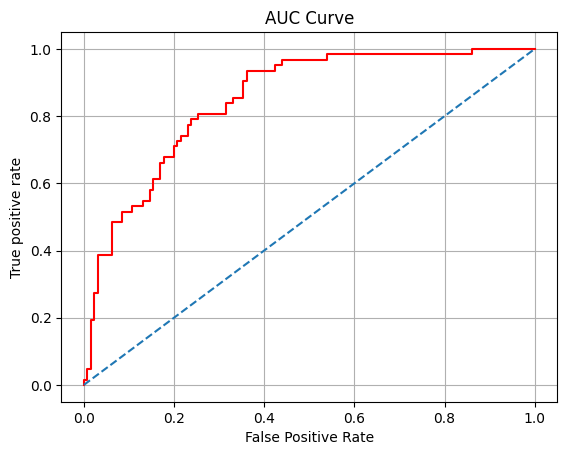

In [40]:
import matplotlib.pyplot as plt
plt.title('AUC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.plot(fpr , tpr, color ='red' , label = auc)
plt.plot ([0,1],[0,1],label = 'random model' , ls = '--')
plt.grid()

In [41]:
log.predict_proba(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [42]:
threshold = 0.7
y_pred_new = (y_pred_prob > threshold).astype(int)

In [43]:
y_pred_new

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])